<a href="https://colab.research.google.com/github/TusharNautiyal-web/CollabNotebooks/blob/main/Understanding_Convolutional_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lets import libs first

In [2]:
pip install tensorflow --quiet

In [6]:
# Importing libraries.
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt 
import seaborn as sns 

# Getting Data from tensorflow
1. We will be using CIFAR10 dataset which contains 60,000 color images in 10 classes, with 6,000 images in each class.
2. The dataset have 10,000 testing images. The classes are mutually exclusive and there is no overlap between them 

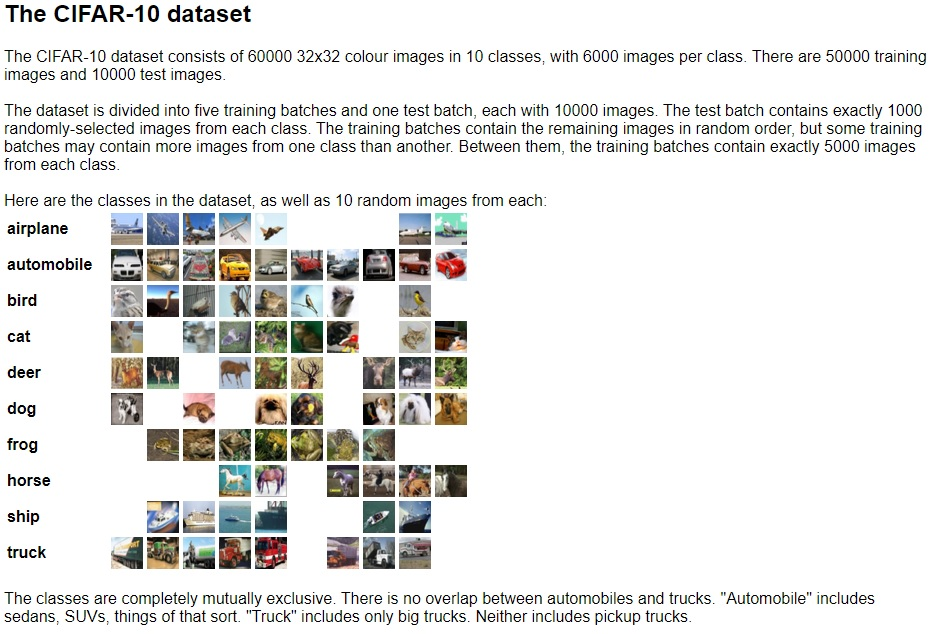

In [7]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
# Normalizing Pixel Values to be between 0 and 1 
train_images, test_images = train_images/255.0, test_images/255.0

170508288/170498071 [==============================] - 2s 0us/step


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


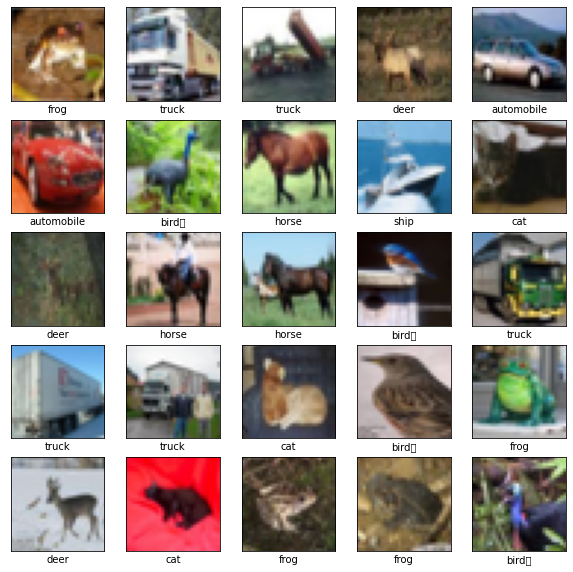

In [23]:
class_names = [
'airplane',										
'automobile',										
'bird	',									
'cat',										
'deer',										
'dog	',									
'frog',										
'horse',										
'ship',										
'truck']
plt.figure(figsize = (10,10))
for i in range(25):  
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(train_images[i])
  plt.xlabel(class_names[train_labels[i][0]])

# Adding Layers 
We will be adding convolution layers and max pooling layers 
and will give them filter values we can try different filters 

In [24]:
classifiers = models.Sequential()
classifiers.add(layers.Conv2D(32,(3,3),activation = 'relu', input_shape = (32,32,3))) # We can write any filters these are like hyperparameters.
classifiers.add(layers.MaxPooling2D((2,2)))
classifiers.add(layers.Conv2D(64, (3,3), activation = 'relu')) # We can write any filters these are like hyperparameters. a proper research requires for filters.
classifiers.add(layers.Conv2D(64, (3,3), activation  = 'relu'))

In [26]:
classifiers.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 conv2d_2 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
Total params: 56,320
Trainable params: 56,320
Non-trainable params: 0
_________________________________________________________________


In [29]:
classifiers.add(layers.Flatten())
classifiers.add(layers.Dense(64, activation = 'relu'))
classifiers.add(layers.Dense(10)) # Because we have only 10 outputs 

In [32]:
# lets compile 
classifiers.compile(optimizer = 'adam',loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True), metrics = ['accuracy'])
history = classifiers.fit(train_images, train_labels, epochs = 10, validation_data = (test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 109s 69ms/step - loss: 1.4734 - accuracy: 0.4681 - val_loss: 1.2351 - val_accuracy: 0.5572
Epoch 2/10
1563/1563 [==============================] - 106s 68ms/step - loss: 1.0931 - accuracy: 0.6136 - val_loss: 1.0669 - val_accuracy: 0.6203
Epoch 3/10
1563/1563 [==============================] - 107s 68ms/step - loss: 0.9371 - accuracy: 0.6719 - val_loss: 1.0299 - val_accuracy: 0.6339
Epoch 4/10
1563/1563 [==============================] - 107s 68ms/step - loss: 0.8290 - accuracy: 0.7112 - val_loss: 0.9583 - val_accuracy: 0.6745
Epoch 5/10
1563/1563 [==============================] - 111s 71ms/step - loss: 0.7401 - accuracy: 0.7419 - val_loss: 0.9116 - val_accuracy: 0.6966
Epoch 6/10
1563/1563 [==============================] - 107s 68ms/step - loss: 0.6606 - accuracy: 0.7688 - val_loss: 0.9219 - val_accuracy: 0.6896
Epoch 7/10
1563/1563 [==============================] - 108s 69ms/step - loss: 0.5861 - accuracy: 0.7949 - val_loss: 0